<a href="https://colab.research.google.com/github/dolunayc/housing-price-app/blob/main/ml_term_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
data = pd.read_csv("housing.csv")

# To view the first 5 rows:
print(data.head())

# To check column information:
print(data.info())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [ ]:
# Check for missing values
print(data.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# 1. Fill missing values ​​with median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])


In [ ]:
# 2. Fill missing values ​​with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])


In [ ]:
print(data.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
# Using one-hot encoding to convert ocean_proximity (categorical variable) into numerical form:
# Check if 'ocean_proximity' is in the columns
if 'ocean_proximity' in data.columns:
    data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
else:
    # If not found, print available columns for debugging
    print(f"Available columns: {data.columns.tolist()}")
    # Optionally, raise an error or handle the missing column differently
    # raise KeyError("'ocean_proximity' column not found in the DataFrame.")

In [ ]:
# Use StandardScaler to bring numeric variables to the same scale
from sklearn.preprocessing import StandardScaler

numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


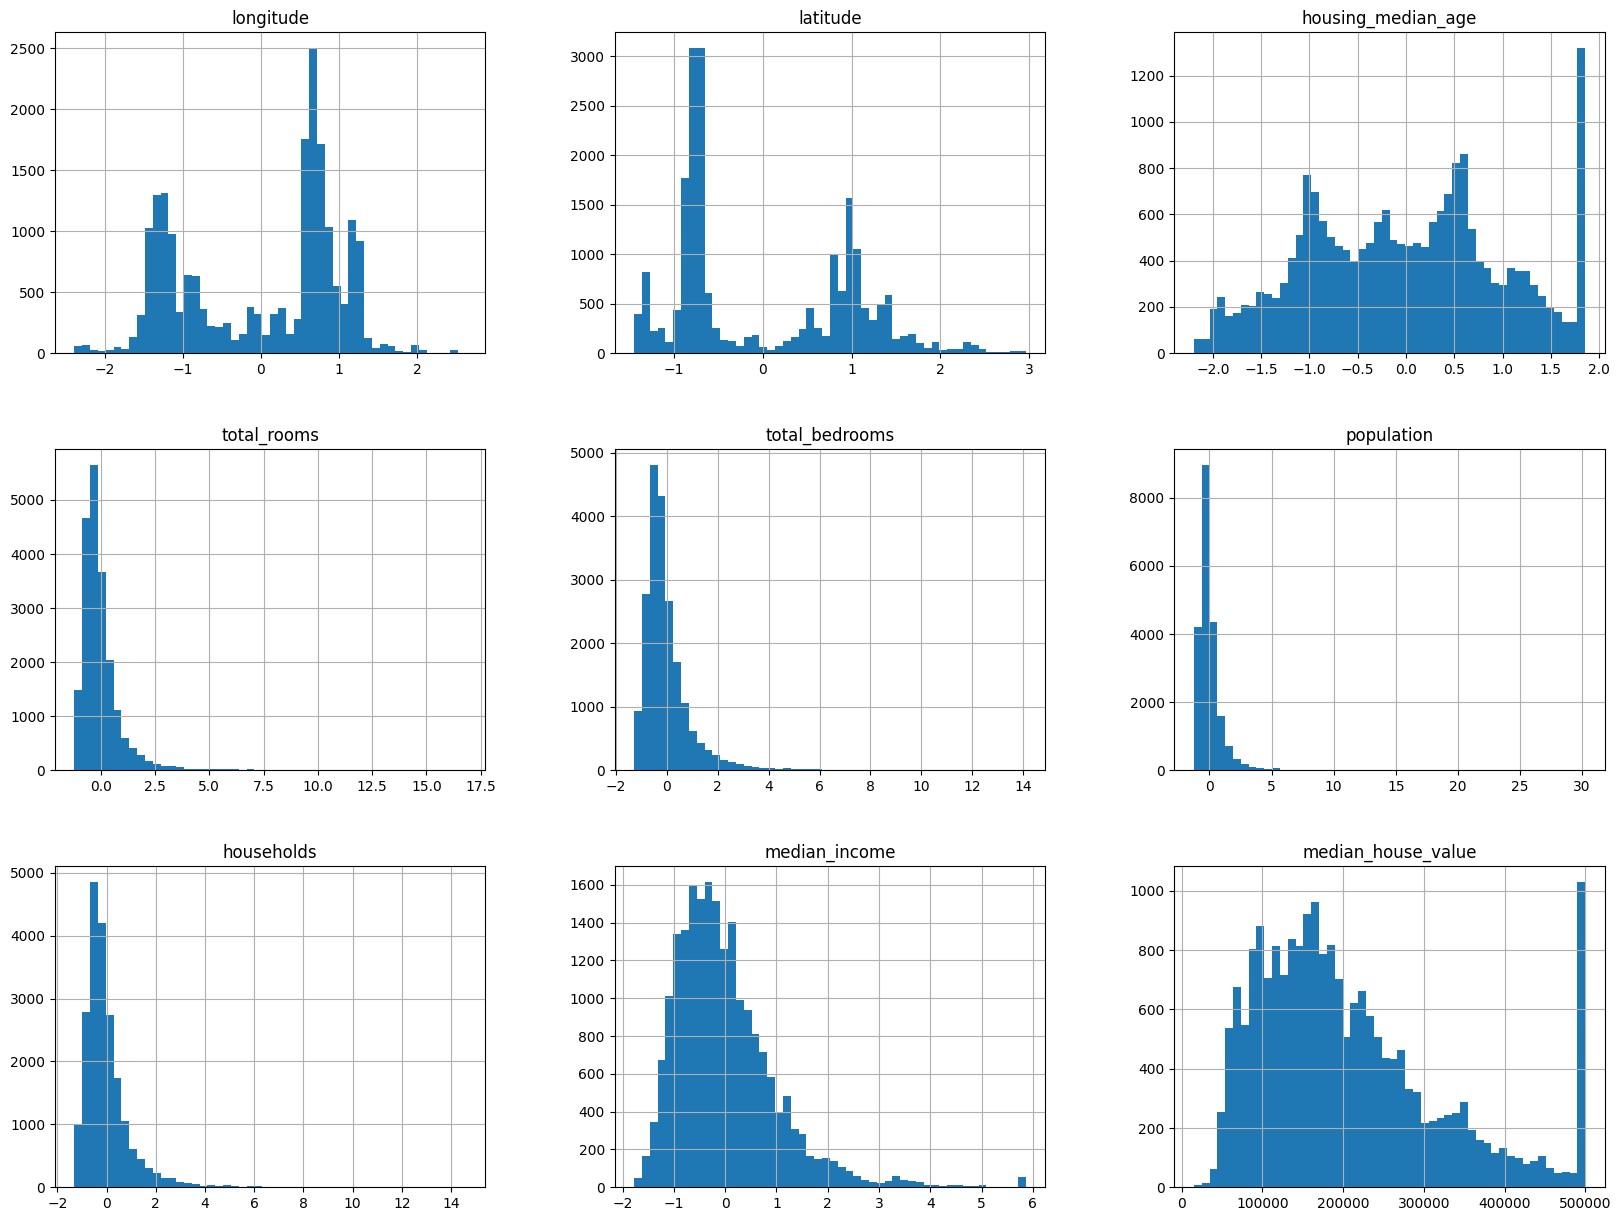

In [ ]:
import matplotlib.pyplot as plt

# Visualizing distribution with histograms
data.hist(bins=50, figsize=(20, 15))
plt.show()


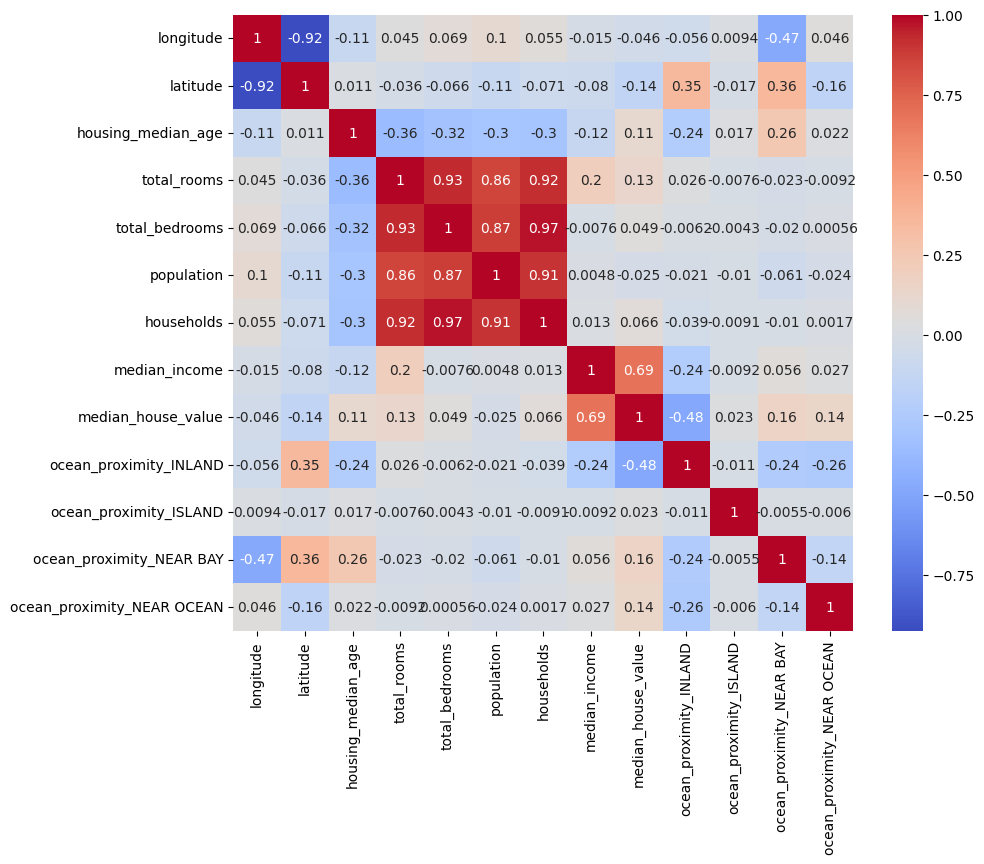

In [ ]:
import seaborn as sns

# Correlation matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()


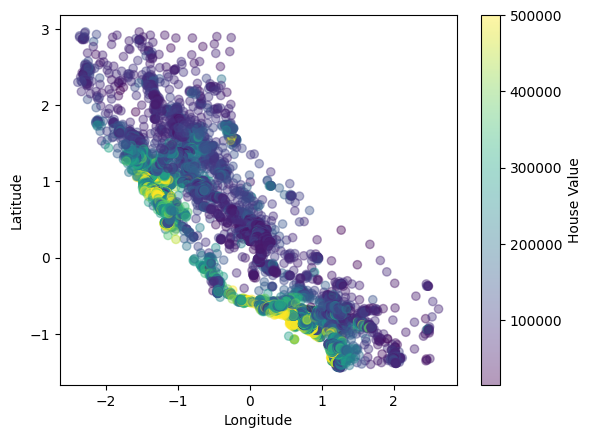

In [ ]:
# Geographic distribution analysis:
plt.scatter(data['longitude'], data['latitude'], alpha=0.4,
            c=data['median_house_value'], cmap='viridis')
plt.colorbar(label='House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


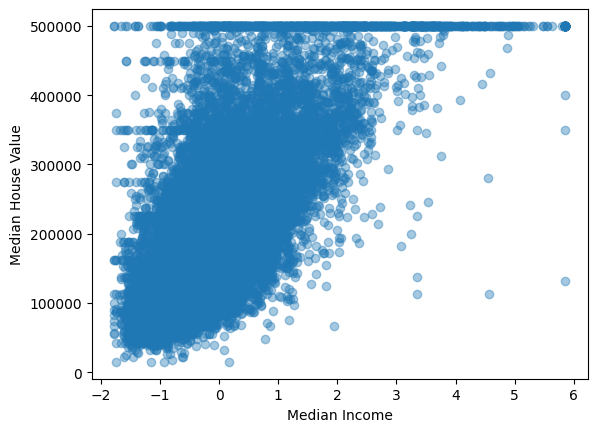

In [ ]:
# Example-correlation analysis to find out if there is a linear relationship between income and house price:
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.4)
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


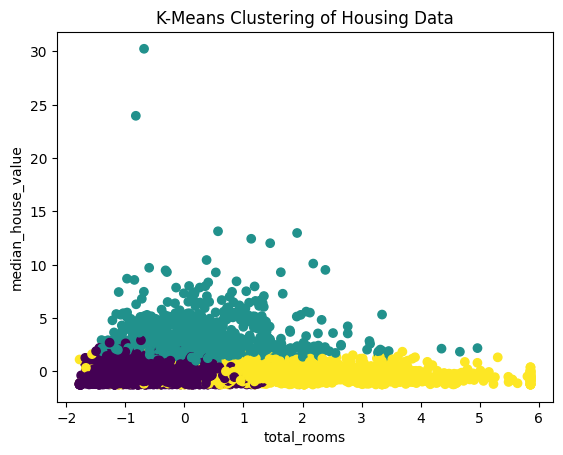

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Upload your data (e.g. from a csv file)
# df = pd.read_csv('california_housing_data.csv')data = pd.read_csv("housing.csv")

features = data[['total_rooms', 'population', 'median_house_value', 'median_income']]  # The features you need

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create the K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)  # Burada 3 kümeye ayırıyoruz, ihtiyaca göre değiştirebilirsiniz
kmeans.fit(scaled_features)

# Get cluster labels
data['Cluster'] = kmeans.labels_

# Visualize results
plt.scatter(data['median_income'], data['population'], c=data['Cluster'], cmap='viridis')
plt.title("K-Means Clustering of Housing Data")
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()


In [ ]:
# Cross Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Defining the model
model = LinearRegression()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluating cross-validation performance
cv_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")

# Summarizing the results
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std

print("Cross-validation results:", cv_scores)
print("Average accuracy:", cv_scores.mean())

Cross-validation results: [0.62542406 0.65125577 0.64745741 0.67437515 0.61789986]
Average accuracy: 0.6432824497387308


In [ ]:
# Comparison of algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



# Assuming X (features) and y (target) are already prepared
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}

# Dictionary to store evaluation metrics
before_tuning_metrics = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Filtering: Calculate MPE for non-zero values in y_test.
    non_zero_indices = y_test != 0
    mpe = np.mean((y_test[non_zero_indices] - y_pred[non_zero_indices]) / y_test[non_zero_indices]) * 100
    mape = np.mean(np.abs((y_test[non_zero_indices] - y_pred[non_zero_indices]) / y_test[non_zero_indices])) * 100



    # Store metrics
    before_tuning_metrics[name] = {
        "R² Score": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MPE": mpe,
    }

# Print the results
for name, before_tuning_metrics in before_tuning_metrics.items():
    print(f"\n{name} Metrics:")
    for metric_name, value in before_tuning_metrics.items():
        print(f"{metric_name}: {value:.4f}")



Linear Regression Metrics:
R² Score: 0.6254
RMSE: 70060.5218
MAE: 50670.7382
MPE: -9.6629

Decision Tree Regressor Metrics:
R² Score: 0.6279
RMSE: 69830.0677
MAE: 44128.9174
MPE: -5.7718

Gradient Boosting Regressor Metrics:
R² Score: 0.7616
RMSE: 55889.9108
MAE: 38251.8112
MPE: -8.0443

Random Forest Regressor Metrics:
R² Score: 0.8186
RMSE: 48761.0001
MAE: 31549.3593
MPE: -6.5702


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grids
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
 },
    'Decision Tree Regressor': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },

    'Random Forest Regressor':{
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
    },

    "Gradient Boosting Regressor": {
        "n_estimators": [50, 100, 150],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7],
    }
}

# Hyperparameter optimization with RandomizedSearchCV
after_tuning_metrics = {}

for name, model in models.items():
    # Define RandomizedSearchCV
    if name == 'Linear Regression':
        random_search = RandomizedSearchCV(model, param_distributions=param_grids[name], n_iter=2, cv=5, n_jobs=-1, random_state=42)
    else:
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name],
                                          n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                          n_jobs=-1, random_state=42)

    # Train the model
    random_search.fit(X_train, y_train)

    # Print the best parameters
    print(f"{name} - Best Parameters:", random_search.best_params_)

    # Make predictions with test data
    y_pred = random_search.best_estimator_.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    # Filtering: Calculate MPE for non-zero values in y_test.
    non_zero_indices = y_test != 0
    mpe = np.mean((y_test[non_zero_indices] - y_pred[non_zero_indices]) / y_test[non_zero_indices]) * 100


    # Store metrics
    after_tuning_metrics[name] = {
        "R² Score": r2,
        "RMSE": rmse,
        "MAE": mae,
        "MPE": mpe,
    }

# Print the results
for name, after_tuning_metrics in after_tuning_metrics.items():
    print(f"\n{name} Metrics:")
    for metric_name, value in after_tuning_metrics.items():
        print(f"{metric_name}: {value:.4f}")




Linear Regression - Best Parameters: {'fit_intercept': True}
Decision Tree Regressor - Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
